## Practica 1 Stadistical Learning 2


**21000341 - Jherson Sazo**

Descripción:

Llenar información de estatura y edad en la pestaña normales(por favor llenar hoy mismo):  
Datos
* Utilizar estos datos(primera pestaña) para implementar :
    * Hard-clustering con k-means (no usar sklearn)
    * Soft-clustering con GMM usando sklearn(sklearn.mixture.GaussianMixture)
* Ejecutar al menos 5 experimentos para seleccionar el valor de “K”
    * Ambos métodos pueden usar el mismo valor de “K”
    * Analizar el centroide de cada cluster y determinar si es posible asignar una categoría  cada cluster
* Analizar y concluir si el método del codo es adecuado para este problema
* Usar los datos en la segunda pestaña(valtest(normales)) y estimar:
    * El cluster que k-means asigna cada uno.
    * La probabilidad de pertenecer a cada cluster según GMM.
* Usar GMM y simular 1000 observaciones para estimar(estimación de Monte Carlo) el valor esperado(promedio) de la función f   f(edad, estatura) = estatura /edad

In [1]:
import numpy as np # Import the necessary packages.
import pandas as pd 
import matplotlib.pyplot as plt

In [4]:
#cluster = pd.read_csv('k-means clustering.csv') # Read data file into 'cluster'
    #cluster = open_excel_by_sheetname('estaturas.xlsx',0) # Read data file into 'cluster'
    #cluster.columns = ['x','y']
data = open_excel_by_sheetname('estaturas.xlsx',0)
data.columns = ['x','y']

In [5]:

epsilon = list(range(4)) # Initialisation of epsilon which would store cost function for each value of 'k' after final iteration.

for k in range(2,6): # Number of clusters
    
    #cluster = pd.read_csv('k-means clustering.csv') # Read data file into 'cluster'
    cluster = open_excel_by_sheetname('estaturas.xlsx',0) # Read data file into 'cluster'
    cluster.columns = ['x','y']
    
    rows = cluster.shape[0] # 'rows' contains the total number of rows in cluster data.
    cols = cluster.shape[1] # 'cols' contains the total number of columns in cluster data.
  
    centroids = cluster.loc[np.random.randint(1,rows+1,k)] # Randomly initialises 'k' no. of centroids.
    centroids['new'] = list(range(1,k+1)) # New indices 1 to k are set for the dataframe 'centroids'.
    centroids.set_index('new',inplace = True) 
    d = np.random.rand(rows) # Initialization of 'd' which would contain the centroid number closest to data point.

    number_of_iterations = 15
    temp_epsilon = list(range(number_of_iterations)) # 'temp_epsilon' is the sum of squares of distances between points and centroid of a cluster for each iteration.

    for i in range(0,number_of_iterations): # This 'for' loop is for iterations.

        for j in range(0,rows): # This 'for' loop finds the centroid number closest to the data point.
            d[j] = ((centroids - cluster.loc[j])**2).sum(axis = 1).idxmin()
        cluster['centroid number'] = d # A new column 'centroid number' is added to dataframe 'cluster'.

        mean_x = list(range(k)) # Initialisation of 'mean_x' which will store mean of 'x' values of each cluster.
        mean_y = list(range(k)) # Initialisation of 'mean_y' which will store mean of 'y' values of each cluster.
        for m in range(0,k): # This 'for' loop calculates mean of 'x' and 'y' values of each cluster.
            mean_x[m] = cluster[cluster['centroid number'] == (m+1)]['x'].mean()
            mean_y[m] = cluster[cluster['centroid number'] == (m+1)]['y'].mean()
        centroids.replace(list(centroids['x']),mean_x,inplace = True) # The 'centroids' are replaced with the new values.
        centroids.replace(list(centroids['y']),mean_y,inplace = True)
    
        z = list(range(k)) # Initialisation of z  and centroid of each cluster.
        for p in range(0,k): # This 'for' loop calculates square of distances between data points and centroid of each cluster.
            z[p] = ((cluster[cluster['centroid number'] == p+1][['x','y']] - centroids.iloc[p])**2).values.sum()
        temp_epsilon[i] = sum(z) 
        
        epsilon[k-2] = temp_epsilon[i] # The cost function after final iteration for each value of 'k' would be stored in epsilon.
    
    %reset_selective -f centroids # The dataframe 'centroids' is reset.
    print(epsilon)

[744.7134928571429, 1, 2, 3]
[744.7134928571429, 275.9608046296296, 2, 3]
[744.7134928571429, 275.9608046296296, 175.68485396825398, 3]
[744.7134928571429, 275.9608046296296, 175.68485396825398, 174.65405875]


Text(0, 0.5, 'Value of Epsilon')

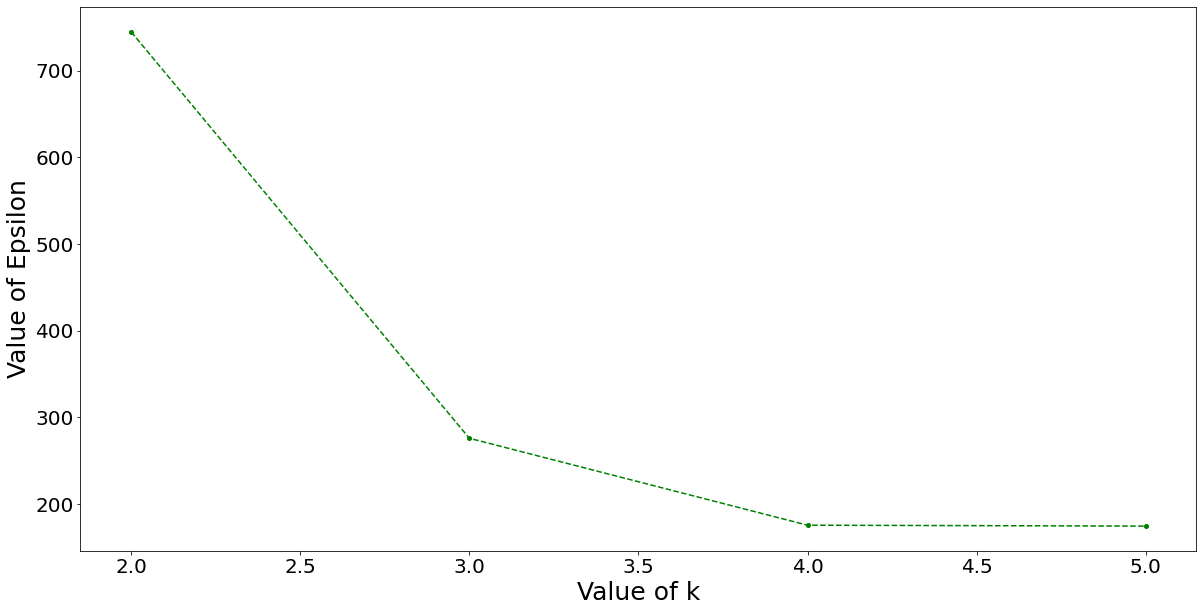

In [6]:
k = list(range(2,6)) # Range of 'k'
plt.figure(figsize=(20,10)) # Size of figure is adjusted.
plt.xticks(fontsize=20) # Size of number labels on x-axis is adjusted.
plt.yticks(fontsize=20) # Size of number labels on y-axis is adjusted.
plt.plot(k,epsilon,'go--', linewidth=1.5, markersize=4) # Graph is plotted.
plt.xlabel('Value of k',fontsize = 25) # x-axis is labelled.
plt.ylabel('Value of Epsilon',fontsize = 25) # y-axis is labelled.

In [3]:
def open_excel_by_sheetname(full_path, name_sheet):
    try:
        df = pd.read_excel(full_path, sheet_name=name_sheet)
        return df
    except Exception as error:
        raise error

In [7]:
cluster = open_excel_by_sheetname('estaturas.xlsx',0) # Read data file into 'cluster'
cluster.head()

,Estatura(metros),Edad(años)
0,1.77,26.0
1,1.74,31.0
2,1.72,24.0
3,1.78,34.0
4,1.65,32.0


## Soft-clustering con GMM

In [8]:
from sklearn.mixture import GaussianMixture

In [9]:
def train_GMM(data, K):
    gm = GaussianMixture(n_components=K, random_state=0).fit(data)
    gm.means_
    return gm


In [24]:
#Experimento 1, 2 clusters
gm = train_GMM(cluster,2)
print(gm.means_)
print(gm.predict([[1.70,28]]))

[[ 1.72384042 25.89825759]
 [ 1.74628242 35.17238953]]
[0]


In [32]:
#Experimento 2, 3 clusters
gm = train_GMM(cluster,3)
print(gm.means_)
print(gm.predict([[1.70,28]]))

[[ 1.72807829 25.58286677]
 [ 1.77666741 48.33323415]
 [ 1.73243803 33.4444868 ]]
[0]


In [26]:
#Experimento 3, 4 clusters
gm = train_GMM(cluster,4)
print(gm.means_)
print(gm.predict([[1.70,28]]))

[[ 1.67056857 28.20035884]
 [ 1.77666859 48.33329889]
 [ 1.75158586 34.17089106]
 [ 1.7503387  24.65611208]]
[0]


In [30]:
#Experimento 4, 5 clusters
gm = train_GMM(cluster,5)
print(gm.means_)
print(gm.predict([[1.70,28]]))

[[ 1.67897568 27.8123578 ]
 [ 1.84       51.        ]
 [ 1.73048713 32.97000029]
 [ 1.7478479  24.64599493]
 [ 1.73406862 40.29442874]]
[0]


In [28]:
#Experimento 5, 1 clusters
gm = train_GMM(cluster,1)
print(gm.means_)
print(gm.predict([[1.70,28]]))

[[ 1.7326087  29.52173913]]
[0]


**Calulando las predicciones del excel**

In [38]:
test = open_excel_by_sheetname('estaturas.xlsx',1) # Read data file into 'cluster'
print(test.head(7))
predicts = gm.predict(test)
print(predicts)



   Estatura(metros)  Edad(años)
0              1.82        25.0
1              1.80        27.0
2              1.60        31.0
3              1.60        35.0
4              1.82        30.0
5              1.76        32.0
6              1.79        31.0
[0 0 2 2 0 2 2 2]


**Estimar el metodo MonteCarlo con 1000 observaciones**

In [47]:
#array de estaturas
height = np.round(np.random.uniform(low=1.4, high=2.01, size=(1000,)),2)
age = np.round(np.random.uniform(low=12, high=28, size=(1000,)),0)



[27. 24. 14. 16. 22. 22. 28. 15. 13. 16. 27. 15. 15. 15. 16. 13. 13. 13.
 17. 17. 26. 21. 16. 16. 15. 15. 16. 22. 16. 24. 18. 17. 21. 19. 20. 21.
 13. 12. 28. 24. 25. 27. 21. 27. 23. 13. 27. 24. 24. 18. 15. 15. 15. 16.
 20. 15. 22. 26. 24. 15. 14. 16. 19. 24. 21. 13. 22. 24. 15. 15. 17. 22.
 25. 14. 21. 22. 25. 18. 13. 20. 25. 25. 21. 20. 20. 16. 17. 13. 15. 21.
 16. 27. 27. 23. 26. 15. 20. 21. 17. 22. 15. 13. 20. 17. 16. 13. 15. 24.
 25. 26. 23. 21. 16. 23. 23. 16. 15. 26. 23. 20. 17. 27. 23. 15. 20. 25.
 23. 19. 16. 27. 25. 23. 18. 26. 25. 17. 17. 25. 21. 27. 26. 24. 16. 20.
 14. 21. 14. 18. 19. 20. 15. 22. 24. 13. 14. 17. 21. 15. 25. 12. 14. 26.
 18. 13. 16. 14. 24. 17. 20. 21. 22. 22. 25. 25. 19. 25. 20. 13. 15. 27.
 20. 26. 19. 18. 24. 18. 19. 18. 14. 24. 18. 16. 22. 27. 13. 20. 12. 21.
 23. 13. 23. 25. 13. 20. 15. 13. 27. 24. 25. 27. 16. 15. 27. 14. 25. 26.
 17. 21. 14. 16. 24. 19. 24. 26. 22. 20. 16. 27. 19. 26. 17. 24. 14. 24.
 20. 26. 14. 24. 21. 24. 18. 26. 22. 27. 14. 17. 13